In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from tqdm import tqdm

# Homework 3

(Total: 50pt)

This is an individual assignment.

## Problem 1 (20pt)

For the digital communication system in part 1, problem 1.

1. Implement both MAP and MLE rule as two functions. (10pt)
2. Plot the probability of error given  $P(A_0)$ range from [0,1] under MAP and MLE rules, using different colors. (10pt)

In [2]:
# Given transition probabilities P(Bj | Ai)
P = np.array([
    [0.5, 0.25, 0.25],  # P(Bj | A0)
    [0.1, 0.3, 0.6]     # P(Bj | A1)
])

def sim2to3(decision_rule, P, PA0, num_sims=10_000, verbose=False):
    # Create all the input events at the same time:
    inputs = np.random.choice([0, 1], num_sims, p=[PA0, 1-PA0])

    # Create an array to determine the channel outputs
    obs = np.zeros(num_sims)
    # Create an array to store the decisions
    decisions = np.zeros(num_sims)
    # There are more efficient ways of doing this using NumPy, but
    # individually determining each output for each input should make
    # this easier to understand for most learners
    for sim in range(num_sims):
        # Choose observation according to transition probabilities for given input bit:
        input_bit = inputs[sim]
        observation = np.random.choice([0, 1, 2], p = P[input_bit])
        obs[sim]= observation

        # Now pass this observation to the decision_rule function:
        decisions[sim] = decision_rule(observation, P, PA0)

    # Finally, calculate the error probability. An error occurs
    # whenever the decision is not equal to the true input
    errors = np.sum(inputs!=decisions)
    error_prob = errors/num_sims
    if verbose:
        print( f'The error probability is approximately {error_prob:.2f}')
    return error_prob

# MLE function
def MLE (observation, P, PA0):
    return np.argmax(P[:, observation]) # select the column corresponding to P(B_j|A_i), i=0,1

# MAP function
def MAP(observation, P, PA0):
    # Take the jth column and multiply it elementwise by the
    # a priori probability vector
    scaled_apps = P[:, observation]*np.array([PA0, 1-PA0])
    return np.argmax(scaled_apps)

In [3]:
sim2to3(MLE, P, 0.6, verbose=True)
sim2to3(MAP, P, 0.6, verbose=True)

The error probability is approximately 0.35
The error probability is approximately 0.31


0.3128

100%|██████████| 21/21 [00:14<00:00,  1.41it/s]


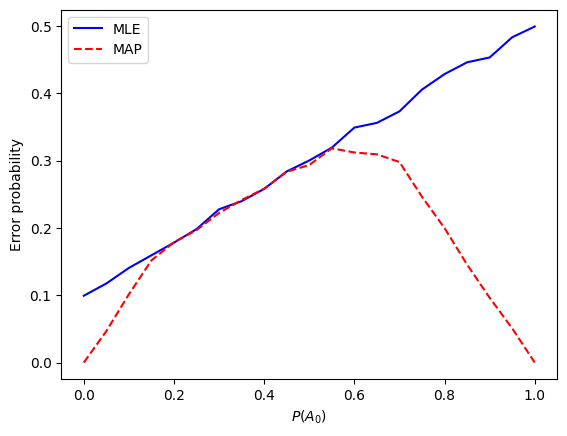

In [9]:
input_probs = np.linspace(0,1,21)

pe_MLE = []
pe_MAP = []

for PA0 in tqdm(input_probs):
    pe_MLE += [sim2to3(MLE, P, PA0)]
    pe_MAP += [sim2to3(MAP, P, PA0)]

plt.plot(input_probs, pe_MLE, 'b', label="MLE")
plt.plot(input_probs, pe_MAP, 'r--', label="MAP")

plt.legend()
plt.xlabel('$P(A_0)$')
plt.ylabel('Error probability');

## problem 2 (10pt)

A pharmaceutical company is testing a new vaccine against a virus. Based on previous studies, the vaccine is known to be 70% effective, meaning that each vaccinated person has a 70% chance of developing immunity.

In a trial, 50 people receive the vaccine.

Simulate the experiment by generating 1,000 random trials and estimate the probability of at least 35 people developing immunity.

In [6]:
num_trials = 1000
num_people = 50
vaccine_effectiveness = 0.7

# Simulate the experiment 1000 times
immune_counts = np.random.binomial(num_people, vaccine_effectiveness, num_trials)

prob_at_least_35 = np.mean(immune_counts >= 35)

print(prob_at_least_35)

0.571


## Problem 3 (20pt)

A small coffee shop tracks the number of customers arriving per hour. Based on past data, they believe the arrival rate  \lambda  follows one of two possible values:
* Hypothesis 0 ( $H_0$ ): The arrival rate is 5 customers per hour ( $\lambda_0 = 5$ ).
* Hypothesis 1 ( $H_1$): The arrival rate is 10 customers per hour ( $\lambda_1 = 10$ ).

Before observing any data, the shop owner believes that both hypotheses are equally likely:

$P(H_1) = P(H_0) = 0.5$


Given an observed customer count  X = k  in one hour, use MAP estimation to determine which hypothesis is more probable.

- Implement a python code to decide, given any k, output the decided hypothesis

In [7]:
lambda_0 = 5
lambda_1 = 10
P_H0 = 0.5
P_H1 = 0.5

def MAP_decision(k):
    # Compute likelihoods P(X=k | Hi) using Poisson distribution
    P_k_given_H0 = poisson.pmf(k, lambda_0)
    P_k_given_H1 = poisson.pmf(k, lambda_1)

    # Compute posteriors using Bayes' rule (P_k are the same)
    if P_k_given_H1 * P_H1 > P_k_given_H0 * P_H0:
        return "H1 (λ=10)"
    else:
        return "H0 (λ=5)"

# Example
test_values = [3, 5, 7, 10, 12, 15]
decision_results = {k: MAP_decision(k) for k in test_values}
print(decision_results)

{3: 'H0 (λ=5)', 5: 'H0 (λ=5)', 7: 'H0 (λ=5)', 10: 'H1 (λ=10)', 12: 'H1 (λ=10)', 15: 'H1 (λ=10)'}
